In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

#必要なライブラリを import 
from sklearn import datasets
import numpy as np

# 訓練用データの取得
data_train = np.loadtxt('Adata_train.csv', delimiter=',', encoding='utf-8_sig')
y_train = data_train[:,0].astype(int)
X_train = data_train[:,1:3] # 5個のパラメタ想定

# テスト用データの取得
data_test = np.loadtxt('Adata_test.csv', delimiter=',', encoding='utf-8_sig') 
y_test = data_test[:,0].astype(int)
X_test = data_test[:,1:3] # 5個のパラメタ想定
print(X_train)

[[ 1.  1.]
 [ 6.  5.]
 [ 8.  9.]
 [ 2.  2.]
 [ 5.  6.]
 [ 8.  9.]
 [ 1.  2.]
 [ 7.  5.]
 [ 9. 10.]
 [ 1.  1.]
 [ 6.  4.]
 [ 8. 10.]
 [ 3.  1.]
 [ 5.  6.]
 [ 8. 10.]
 [ 2.  1.]
 [ 7.  5.]
 [ 9.  8.]
 [ 3.  2.]
 [ 6.  5.]
 [ 9. 10.]
 [ 2.  2.]
 [ 4.  6.]
 [ 7.  9.]]


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

# データの標準化処理
#sc = StandardScaler()
#sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)

In [3]:
from sklearn.svm import SVC

from sklearn.datasets import load_digits
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

# 線形SVMのインスタンスを生成
estimator = SVC(kernel='linear', gamma=1/2 , C=1.0,class_weight='balanced', random_state=0)
model = OneVsRestClassifier(estimator)

# モデルの学習。fit関数で行う。
#model.fit(X_train_std, y_train)
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(class_weight='balanced', gamma=0.5,
                                  kernel='linear', random_state=0))

In [4]:
from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度
#pred_train = model.predict(X_train_std)
pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

# テストデータに対する精度
#pred_test = model.predict(X_test_std)
pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, pred_test)
print('テストデータに対する正解率： %.2f' % accuracy_test)

トレーニングデータに対する正解率： 0.96
テストデータに対する正解率： 0.67


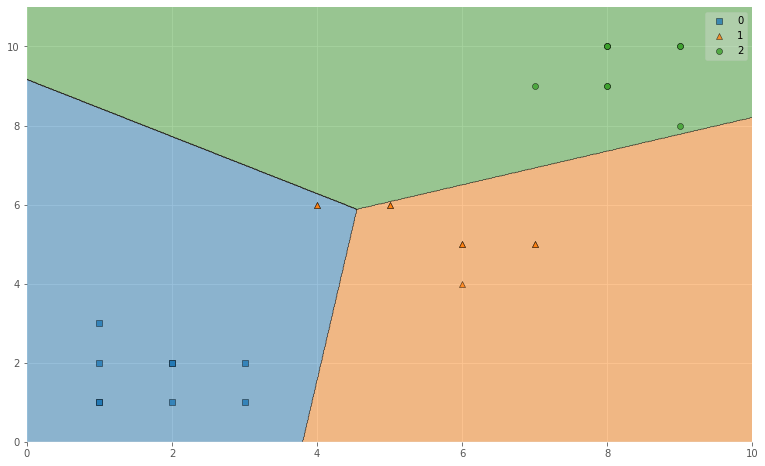

---トレーニングデータに対する評価------
正解率： 0.96
再現率：
[1.    0.875 1.   ]
適合率：
[0.88888889 1.         1.        ]
F値：
[0.94117647 0.93333333 1.        ]
---テストデータに対する評価------
正解率： 0.67
再現率：
[1. 0. 1.]
適合率：
[0.5 0.  1. ]
F値：
[0.66666667 0.         1.        ]


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
#分類結果を図示する
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

#X_combined_std = np.vstack((X_train_std, X_test_std))
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

fig = plt.figure(figsize=(13,8))
# 要修正
plot_decision_regions(X_combined, y_combined, clf=model,  res=0.02)
plt.show()

train = y_train
pred = pred_train
name = [0,1,2]

print("---トレーニングデータに対する評価------")
from sklearn.metrics import confusion_matrix
val_mat = confusion_matrix(train, pred, labels=name)
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(train, pred)
print("正解率： %.2f" % acc_score)
from sklearn.metrics import recall_score
rec_score = recall_score(train, pred, average=None)
print("再現率：")
print(rec_score)
from sklearn.metrics import precision_score
pre_score = precision_score(train, pred, average=None)
print("適合率：")
print(pre_score)
from sklearn.metrics import f1_score
f1_score = f1_score(train, pred, average=None)
print("F値：")
print(f1_score)

train = y_test
pred = pred_test
name = [0,1,2]

print("---テストデータに対する評価------")
from sklearn.metrics import confusion_matrix
val_mat = confusion_matrix(train, pred, labels=name)
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(train, pred)
print("正解率： %.2f" % acc_score)
from sklearn.metrics import recall_score
rec_score = recall_score(train, pred, average=None)
print("再現率：")
print(rec_score)
from sklearn.metrics import precision_score
pre_score = precision_score(train, pred, average=None)
print("適合率：")
print(pre_score)
from sklearn.metrics import f1_score
f1_score = f1_score(train, pred, average=None)
print("F値：")
print(f1_score)

In [6]:
# 書き出し
import os
path_w = './../../Assets/SVM/Parameters'

np.savetxt(os.path.join(path_w, 'A_coef.txt'), model.coef_, fmt='%0.18f')
np.savetxt(os.path.join(path_w, 'A_intercept.txt'), model.intercept_, fmt='%0.18f')
#np.savetxt(os.path.join(path_w, 'supportVector.txt'), model.support_vectors_, fmt='%0.18f')
#np.savetxt(os.path.join(path_w, 'dualCoef.txt'), model.dual_coef_, fmt='%0.18f')

In [7]:
# WX+b=0のW (kernel="linear"のときのみ利用可)
#print(len(model.coef_))
#print(model.coef_)

In [8]:
# WX+b=0のb
#print(len(model.intercept_))
#print(model.intercept_)

In [9]:
# サポートベクタ
#print(len(model.support_vectors_))
#print(model.support_vectors_)

In [10]:
# サポートベクタとの乗算でW
#print(len(model.dual_coef_))
#print(model.dual_coef_)

トレーニングデータに対する正解率： 1.00
テストデータに対する正解率： 1.00


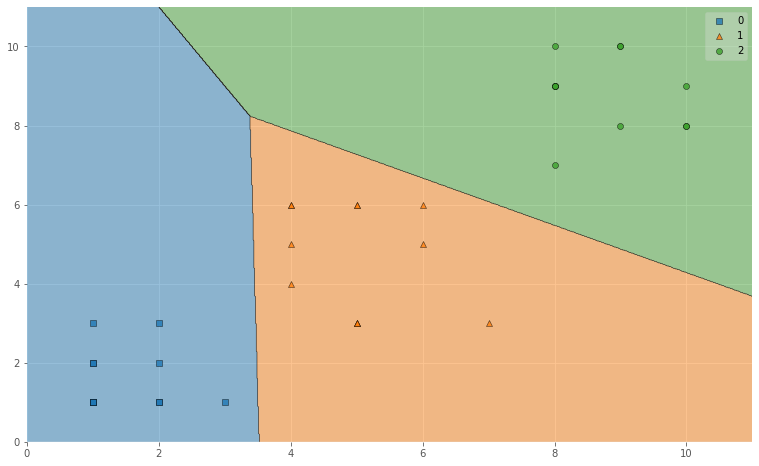

---トレーニングデータに対する評価------
正解率： 1.00
再現率：
[1. 1. 1.]
適合率：
[1. 1. 1.]
F値：
[1. 1. 1.]
---テストデータに対する評価------
正解率： 1.00
再現率：
[1. 1. 1.]
適合率：
[1. 1. 1.]
F値：
[1. 1. 1.]


In [11]:
# Valenceに対しても同様

#必要なライブラリを import 
from sklearn import datasets
import numpy as np

# 訓練用データの取得
data_train = np.loadtxt('Vdata_train.csv', delimiter=',', encoding='utf-8_sig')
y_train = data_train[:,0].astype(int)
X_train = data_train[:,1:3] # 5個のパラメタ想定

# テスト用データの取得
data_test = np.loadtxt('Vdata_test.csv', delimiter=',', encoding='utf-8_sig') 
y_test = data_test[:,0].astype(int)
X_test = data_test[:,1:3] # 3個のパラメタ想定


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

# データの標準化処理
#sc = StandardScaler()
#sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)


from sklearn.svm import SVC

from sklearn.datasets import load_digits
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

# 線形SVMのインスタンスを生成
estimator = SVC(kernel='linear', gamma=1/2 , C=1.0,class_weight='balanced', random_state=0)
model = OneVsRestClassifier(estimator)

# モデルの学習。fit関数で行う。
#model.fit(X_train_std, y_train)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度
#pred_train = model.predict(X_train_std)
pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

# テストデータに対する精度
#pred_test = model.predict(X_test_std)
pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, pred_test)
print('テストデータに対する正解率： %.2f' % accuracy_test)

"""
#分類結果を図示する
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_combined_std, y_combined, clf=model,  res=0.02)
plt.show()
"""

#分類結果を図示する
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

#X_combined_std = np.vstack((X_train_std, X_test_std))
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

fig = plt.figure(figsize=(13,8))
# 要修正
plot_decision_regions(X_combined, y_combined, clf=model,  res=0.02)
plt.show()


# 書き出し
import os
path_w = './../../Assets/SVM/Parameters'

np.savetxt(os.path.join(path_w, 'V_coef.txt'), model.coef_, fmt='%0.18f')
np.savetxt(os.path.join(path_w, 'V_intercept.txt'), model.intercept_, fmt='%0.18f')
#np.savetxt(os.path.join(path_w, 'V_supportVector.txt'), model.support_vectors_, fmt='%0.18f')
#np.savetxt(os.path.join(path_w, 'V_dualCoef.txt'), model.dual_coef_, fmt='%0.18f')

train = y_train
pred = pred_train
name = [0,1,2]

print("---トレーニングデータに対する評価------")
from sklearn.metrics import confusion_matrix
val_mat = confusion_matrix(train, pred, labels=name)
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(train, pred)
print("正解率： %.2f" % acc_score)
from sklearn.metrics import recall_score
rec_score = recall_score(train, pred, average=None)
print("再現率：")
print(rec_score)
from sklearn.metrics import precision_score
pre_score = precision_score(train, pred, average=None)
print("適合率：")
print(pre_score)
from sklearn.metrics import f1_score
f1_score = f1_score(train, pred, average=None)
print("F値：")
print(f1_score)

train = y_test
pred = pred_test
name = [0,1,2]

print("---テストデータに対する評価------")
from sklearn.metrics import confusion_matrix
val_mat = confusion_matrix(train, pred, labels=name)
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(train, pred)
print("正解率： %.2f" % acc_score)
from sklearn.metrics import recall_score
rec_score = recall_score(train, pred, average=None)
print("再現率：")
print(rec_score)
from sklearn.metrics import precision_score
pre_score = precision_score(train, pred, average=None)
print("適合率：")
print(pre_score)
from sklearn.metrics import f1_score
f1_score = f1_score(train, pred, average=None)
print("F値：")
print(f1_score)